In [27]:
import pandas as pd
import pickle

In [71]:
spotify = pd.read_csv('../data/SpotifyDataframe')

In [72]:
len(spotify)

1594

In [73]:
spotify.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,RAYE,Love Of Your Life,Love Of Your Life,5iqfKcEGKhoeWTNqmZPiu3,0.632,0.826,10,-5.326,0,0.0699,0.000003,0.1460,0.474,111.886,196171,4
1,1,Ariana Grande,Positions,pov,3UoULw70kMsiVXxW0L3A33,0.487,0.534,0,-5.664,0,0.0555,0.000000,0.1000,0.173,131.798,201882,4
2,2,Dan Talevski,Don't Ever Leave,Don't Ever Leave,6drtmkgMWpehwKX2si4DEl,0.392,0.604,6,-5.965,1,0.0512,0.000004,0.1790,0.499,88.406,148906,4
3,3,LANY,mama's boy,nobody else,7GLBqDKAJLCLIsj2GEDkSw,0.569,0.291,0,-14.509,1,0.0430,0.000000,0.1370,0.313,151.659,197480,4
4,4,Aloe Blacc,All Love Everything,All Love Everything,7g5bq2JSKV0eNKTFluoQNt,0.726,0.562,4,-8.226,1,0.0817,0.000000,0.0774,0.757,160.157,147947,4


In [74]:
spotify[['danceability' ,'energy' ,'loudness','speechiness' ,'instrumentalness' ,'liveness','valence']]

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence
0,0.632,0.826,-5.326,0.0699,0.000003,0.1460,0.474
1,0.487,0.534,-5.664,0.0555,0.000000,0.1000,0.173
2,0.392,0.604,-5.965,0.0512,0.000004,0.1790,0.499
3,0.569,0.291,-14.509,0.0430,0.000000,0.1370,0.313
4,0.726,0.562,-8.226,0.0817,0.000000,0.0774,0.757
...,...,...,...,...,...,...,...
1589,0.810,0.916,-8.402,0.1440,0.863000,0.0393,0.750
1590,0.799,0.890,-4.945,0.0403,0.908000,0.0556,0.201
1591,0.802,0.740,-10.700,0.0524,0.360000,0.4390,0.373
1592,0.803,0.965,-9.617,0.0663,0.908000,0.0512,0.817


#### Dataframe only Audio features

In [75]:
X = spotify[['danceability' ,'energy' ,'loudness','speechiness' ,'instrumentalness' ,'liveness','valence']]

In [76]:
X.head()

,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence
0,0.632,0.826,-5.326,0.0699,0.000003,0.1460,0.474
1,0.487,0.534,-5.664,0.0555,0.000000,0.1000,0.173
2,0.392,0.604,-5.965,0.0512,0.000004,0.1790,0.499
3,0.569,0.291,-14.509,0.0430,0.000000,0.1370,0.313
4,0.726,0.562,-8.226,0.0817,0.000000,0.0774,0.757


#### Normalizing Data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
X_scaled = scaler.fit_transform(X)

In [80]:
pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6
0,-0.335360,0.826258,0.539122,-0.213690,-0.376757,-0.164441,-0.290753
1,-1.397093,-0.815053,0.427137,-0.368361,-0.376769,-0.503348,-1.626951
2,-2.092711,-0.421588,0.327411,-0.414548,-0.376751,0.078688,-0.179773
3,-0.796665,-2.180938,-2.503366,-0.502624,-0.376769,-0.230749,-1.005463
4,0.352936,-0.657667,-0.421698,-0.086945,-0.376769,-0.669854,0.965539
...,...,...,...,...,...,...,...
1589,0.968008,1.332141,-0.480010,0.582223,3.204690,-0.950558,0.934465
1590,0.887463,1.185997,0.665354,-0.531625,3.391440,-0.830467,-1.502653
1591,0.909430,0.342858,-1.241377,-0.401658,1.117235,1.994249,-0.739112
1592,0.916752,1.607567,-0.882561,-0.252358,3.391440,-0.862884,1.231891


#### Clustering

In [81]:
from sklearn.cluster import KMeans

In [90]:
kmeans = KMeans(n_clusters=7, random_state=1234)

In [91]:
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [92]:
clusters = kmeans.predict(X_scaled)

In [93]:
pd.Series(clusters).value_counts()

6    382
1    363
4    315
0    162
5    155
3    147
2     70
dtype: int64

#### Calculating inertia

In [89]:
kmeans = KMeans(n_clusters=7,
                init="random",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=50,
                tol=0,
                algorithm="auto",
                random_state=1234)
kmeans.fit(X_scaled)
print(kmeans.inertia_)

5116.541153310161


#### Visualize Elbow Method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

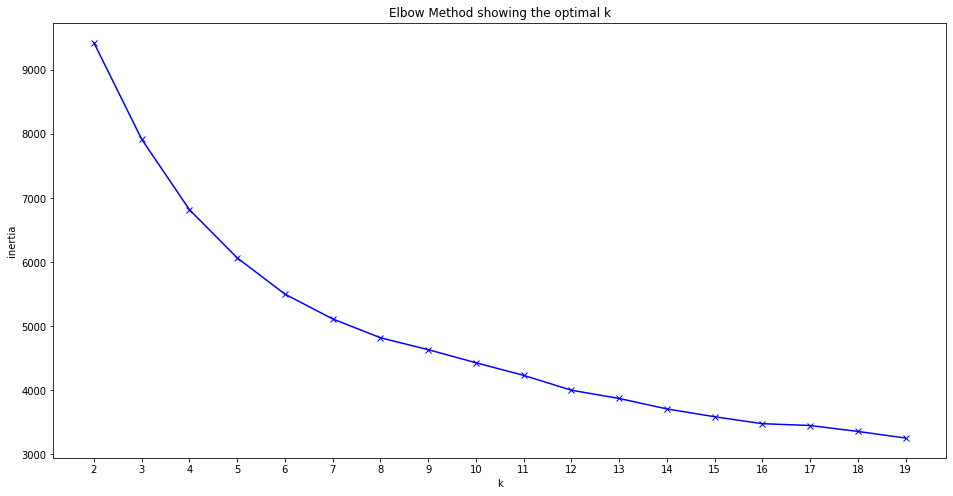

In [88]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [94]:
#new_df = pd.DataFrame(X)
#new_df['cluster'] = clusters
spotify['clusters'] = clusters

In [95]:
spotify.head()

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0,RAYE,Love Of Your Life,Love Of Your Life,5iqfKcEGKhoeWTNqmZPiu3,0.632,0.826,10,-5.326,0,0.0699,0.000003,0.1460,0.474,111.886,196171,4,1
1,1,Ariana Grande,Positions,pov,3UoULw70kMsiVXxW0L3A33,0.487,0.534,0,-5.664,0,0.0555,0.000000,0.1000,0.173,131.798,201882,4,0
2,2,Dan Talevski,Don't Ever Leave,Don't Ever Leave,6drtmkgMWpehwKX2si4DEl,0.392,0.604,6,-5.965,1,0.0512,0.000004,0.1790,0.499,88.406,148906,4,1
3,3,LANY,mama's boy,nobody else,7GLBqDKAJLCLIsj2GEDkSw,0.569,0.291,0,-14.509,1,0.0430,0.000000,0.1370,0.313,151.659,197480,4,0
4,4,Aloe Blacc,All Love Everything,All Love Everything,7g5bq2JSKV0eNKTFluoQNt,0.726,0.562,4,-8.226,1,0.0817,0.000000,0.0774,0.757,160.157,147947,4,4


In [96]:
len(spotify)

1594

In [97]:
spotifydataset = spotify.drop('Unnamed: 0',axis=1)

In [98]:
spotifydataset

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,RAYE,Love Of Your Life,Love Of Your Life,5iqfKcEGKhoeWTNqmZPiu3,0.632,0.826,10,-5.326,0,0.0699,0.000003,0.1460,0.474,111.886,196171,4,1
1,Ariana Grande,Positions,pov,3UoULw70kMsiVXxW0L3A33,0.487,0.534,0,-5.664,0,0.0555,0.000000,0.1000,0.173,131.798,201882,4,0
2,Dan Talevski,Don't Ever Leave,Don't Ever Leave,6drtmkgMWpehwKX2si4DEl,0.392,0.604,6,-5.965,1,0.0512,0.000004,0.1790,0.499,88.406,148906,4,1
3,LANY,mama's boy,nobody else,7GLBqDKAJLCLIsj2GEDkSw,0.569,0.291,0,-14.509,1,0.0430,0.000000,0.1370,0.313,151.659,197480,4,0
4,Aloe Blacc,All Love Everything,All Love Everything,7g5bq2JSKV0eNKTFluoQNt,0.726,0.562,4,-8.226,1,0.0817,0.000000,0.0774,0.757,160.157,147947,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,Rone White,Little Helpers 362,Little Helper 362-4,5OqMra3X5xyTIAZa9PNAtZ,0.810,0.916,11,-8.402,0,0.1440,0.863000,0.0393,0.750,123.011,383012,4,3
1590,Meli Rodriguez,Intro,Intro,58SSR1huhsUn9hmxRPJyKx,0.799,0.890,11,-4.945,1,0.0403,0.908000,0.0556,0.201,127.997,388000,4,3
1591,D'Gian,Make My Day,Make My Day,7L1vmBpMCtf52geCqwtquP,0.802,0.740,10,-10.700,0,0.0524,0.360000,0.4390,0.373,124.990,349440,4,2
1592,Versus,Demented,Demented,6cMH8f3toOvi9HLkeHrUyR,0.803,0.965,9,-9.617,1,0.0663,0.908000,0.0512,0.817,127.008,411969,4,3


In [99]:
spotify.to_csv('..\data\spotifyclustered')

In [100]:
pickle.dump(kmeans, open("kmeans", "wb"))
pickle.dump(scaler, open("scaler", "wb"))